In [6]:
import pandas as pd
import pickle

# Read the data

In [12]:
y = pd.read_excel('../data/CIC.xlsx', parse_dates=['date'], index_col='date')['CIC']
holiday_type = pd.read_excel('../data/holidays.xlsx', parse_dates=['date'], index_col='date')
holiday_type = pd.get_dummies(holiday_type['Type']).astype(int)
X = holiday_type.resample('B').last().fillna(0)

# Read the model

In [8]:
model = pickle.load(open('../model_output/CIC_forecast.pkl', 'rb'))

# Forecast

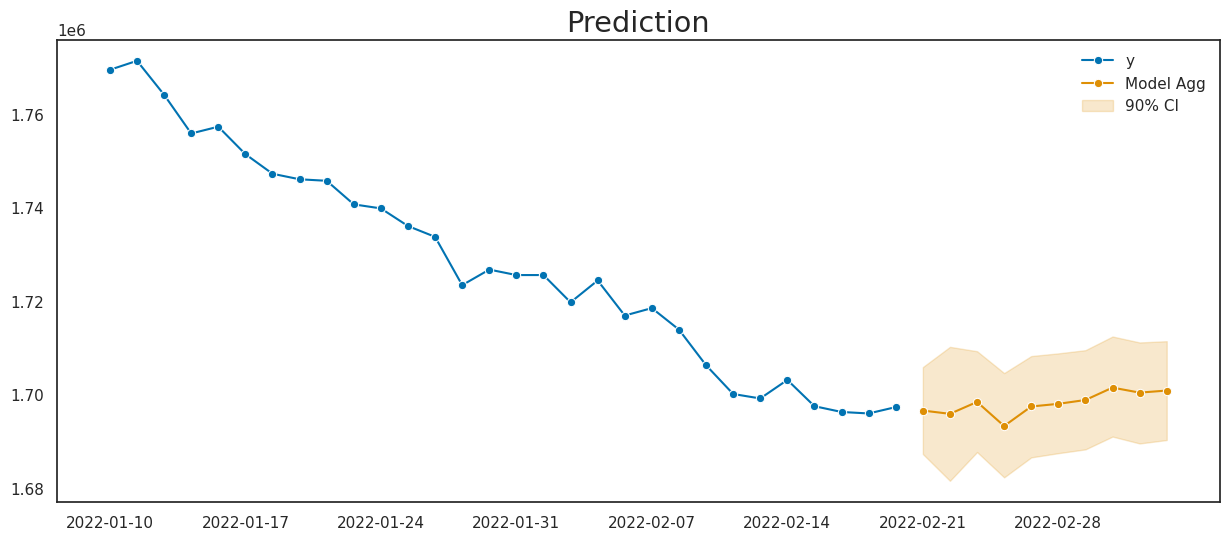

In [15]:
y_pred, y_pred_ints, preds, pred_ints = model.update(new_y=y, new_X=X,
                                                     mode='best_horizon',
                                                     ret_underlying=True)
f, ax = model.plot_prediction(y_pred = y_pred,
                     models_preds = None,
                     y_pred_interval = y_pred_ints) 